In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
listings = pd.read_csv('../data/listings.csv')

In [3]:
listings.head()

id                                               name  host_id  \
0  11551         Arty and Bright London Apartment in Zone 2    43039   
1  13913                Holiday London DB Room Let-on going    54730   
2  15400                Bright Chelsea  Apartment. Chelsea!    60302   
3  17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564   
4  17506  Boutique Chelsea/Fulham Double bed 5-star ensuite    67915   

   host_name  neighbourhood_group           neighbourhood  latitude  \
0    Adriano                  NaN                 Lambeth  51.46225   
1      Alina                  NaN               Islington  51.56802   
2   Philippa                  NaN  Kensington and Chelsea  51.48796   
3        Liz                  NaN             Westminster  51.52195   
4  Charlotte                  NaN  Hammersmith and Fulham  51.47935   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0   -0.11732  Entire home/apt     97               7                192   
1   -0.11121     Private room     40               1                 21   
2   -0.16898  Entire home/apt     75              10                 89   
3   -0.14094  Entire home/apt    307               4                 42   
4   -0.19743     Private room    150               3                  0   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2020-03-26               1.48                               2   
1  2020-02-22               0.17                               2   
2  2020-03-16               0.67                               1   
3  2019-11-02               0.36                              15   
4         NaN                NaN                               2   

   availability_365  
0               279  
1               365  
2               150  
3               330  
4               364

In [4]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
listings.shape

(76984, 16)

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76984 entries, 0 to 76983
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              76984 non-null  int64  
 1   name                            76961 non-null  object 
 2   host_id                         76984 non-null  int64  
 3   host_name                       76973 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   76984 non-null  object 
 6   latitude                        76984 non-null  float64
 7   longitude                       76984 non-null  float64
 8   room_type                       76984 non-null  object 
 9   price                           76984 non-null  int64  
 10  minimum_nights                  76984 non-null  int64  
 11  number_of_reviews               76984 non-null  int64  
 12  last_review                     

In [7]:
listings.isnull().sum()

id                                    0
name                                 23
host_id                               0
host_name                            11
neighbourhood_group               76984
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       21733
reviews_per_month                 21733
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
del listings['neighbourhood_group']

In [9]:
listings.describe()

id       host_id      latitude     longitude         price  \
count  7.698400e+04  7.698400e+04  76984.000000  76984.000000  76984.000000   
mean   2.562503e+07  9.517164e+07     51.509932     -0.128256    112.107932   
std    1.319053e+07  1.001727e+08      0.047514      0.094815    325.929453   
min    1.155100e+04  2.010000e+03     51.283370     -0.496870      0.000000   
25%    1.509091e+07  1.612489e+07     51.484140     -0.188622     43.000000   
50%    2.585057e+07  4.947226e+07     51.514030     -0.126000     75.000000   
75%    3.760606e+07  1.529558e+08     51.539240     -0.069480    121.000000   
max    4.626152e+07  3.745225e+08     51.685230      0.288570  18673.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    76984.000000        76984.00000       55251.000000   
mean         5.142120           15.58316           0.654365   
std         22.477012           35.65037           0.935893   
min          1.000000            0.00000           0.010000   
25%          1.000000            0.00000           0.120000   
50%          2.000000            3.00000           0.340000   
75%          3.000000           15.00000           0.850000   
max       1125.000000          813.00000          48.290000   

       calculated_host_listings_count  availability_365  
count                    76984.000000      76984.000000  
mean                        19.734750        120.041996  
std                         98.506565        142.734199  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         53.000000  
75%                          3.000000        251.000000  
max                        878.000000        365.000000

In [10]:
listings = listings[(listings["price"]>0) | (listings["number_of_reviews"]>0)]

In [11]:
len(listings)

76974

In [12]:
room_type_group_count = listings.groupby("room_type").id.count().sort_values(ascending=False)
room_type_group_count = room_type_group_count.reset_index()
room_type_group_count.rename(columns={"id":"count"}, inplace=True)
room_type_group_count["percentage"]=round(room_type_group_count["count"] / room_type_group_count["count"].sum()*100,2)
room_type_group_count

room_type  count  percentage
0  Entire home/apt  42209       54.84
1     Private room  33572       43.61
2      Shared room    621        0.81
3       Hotel room    572        0.74

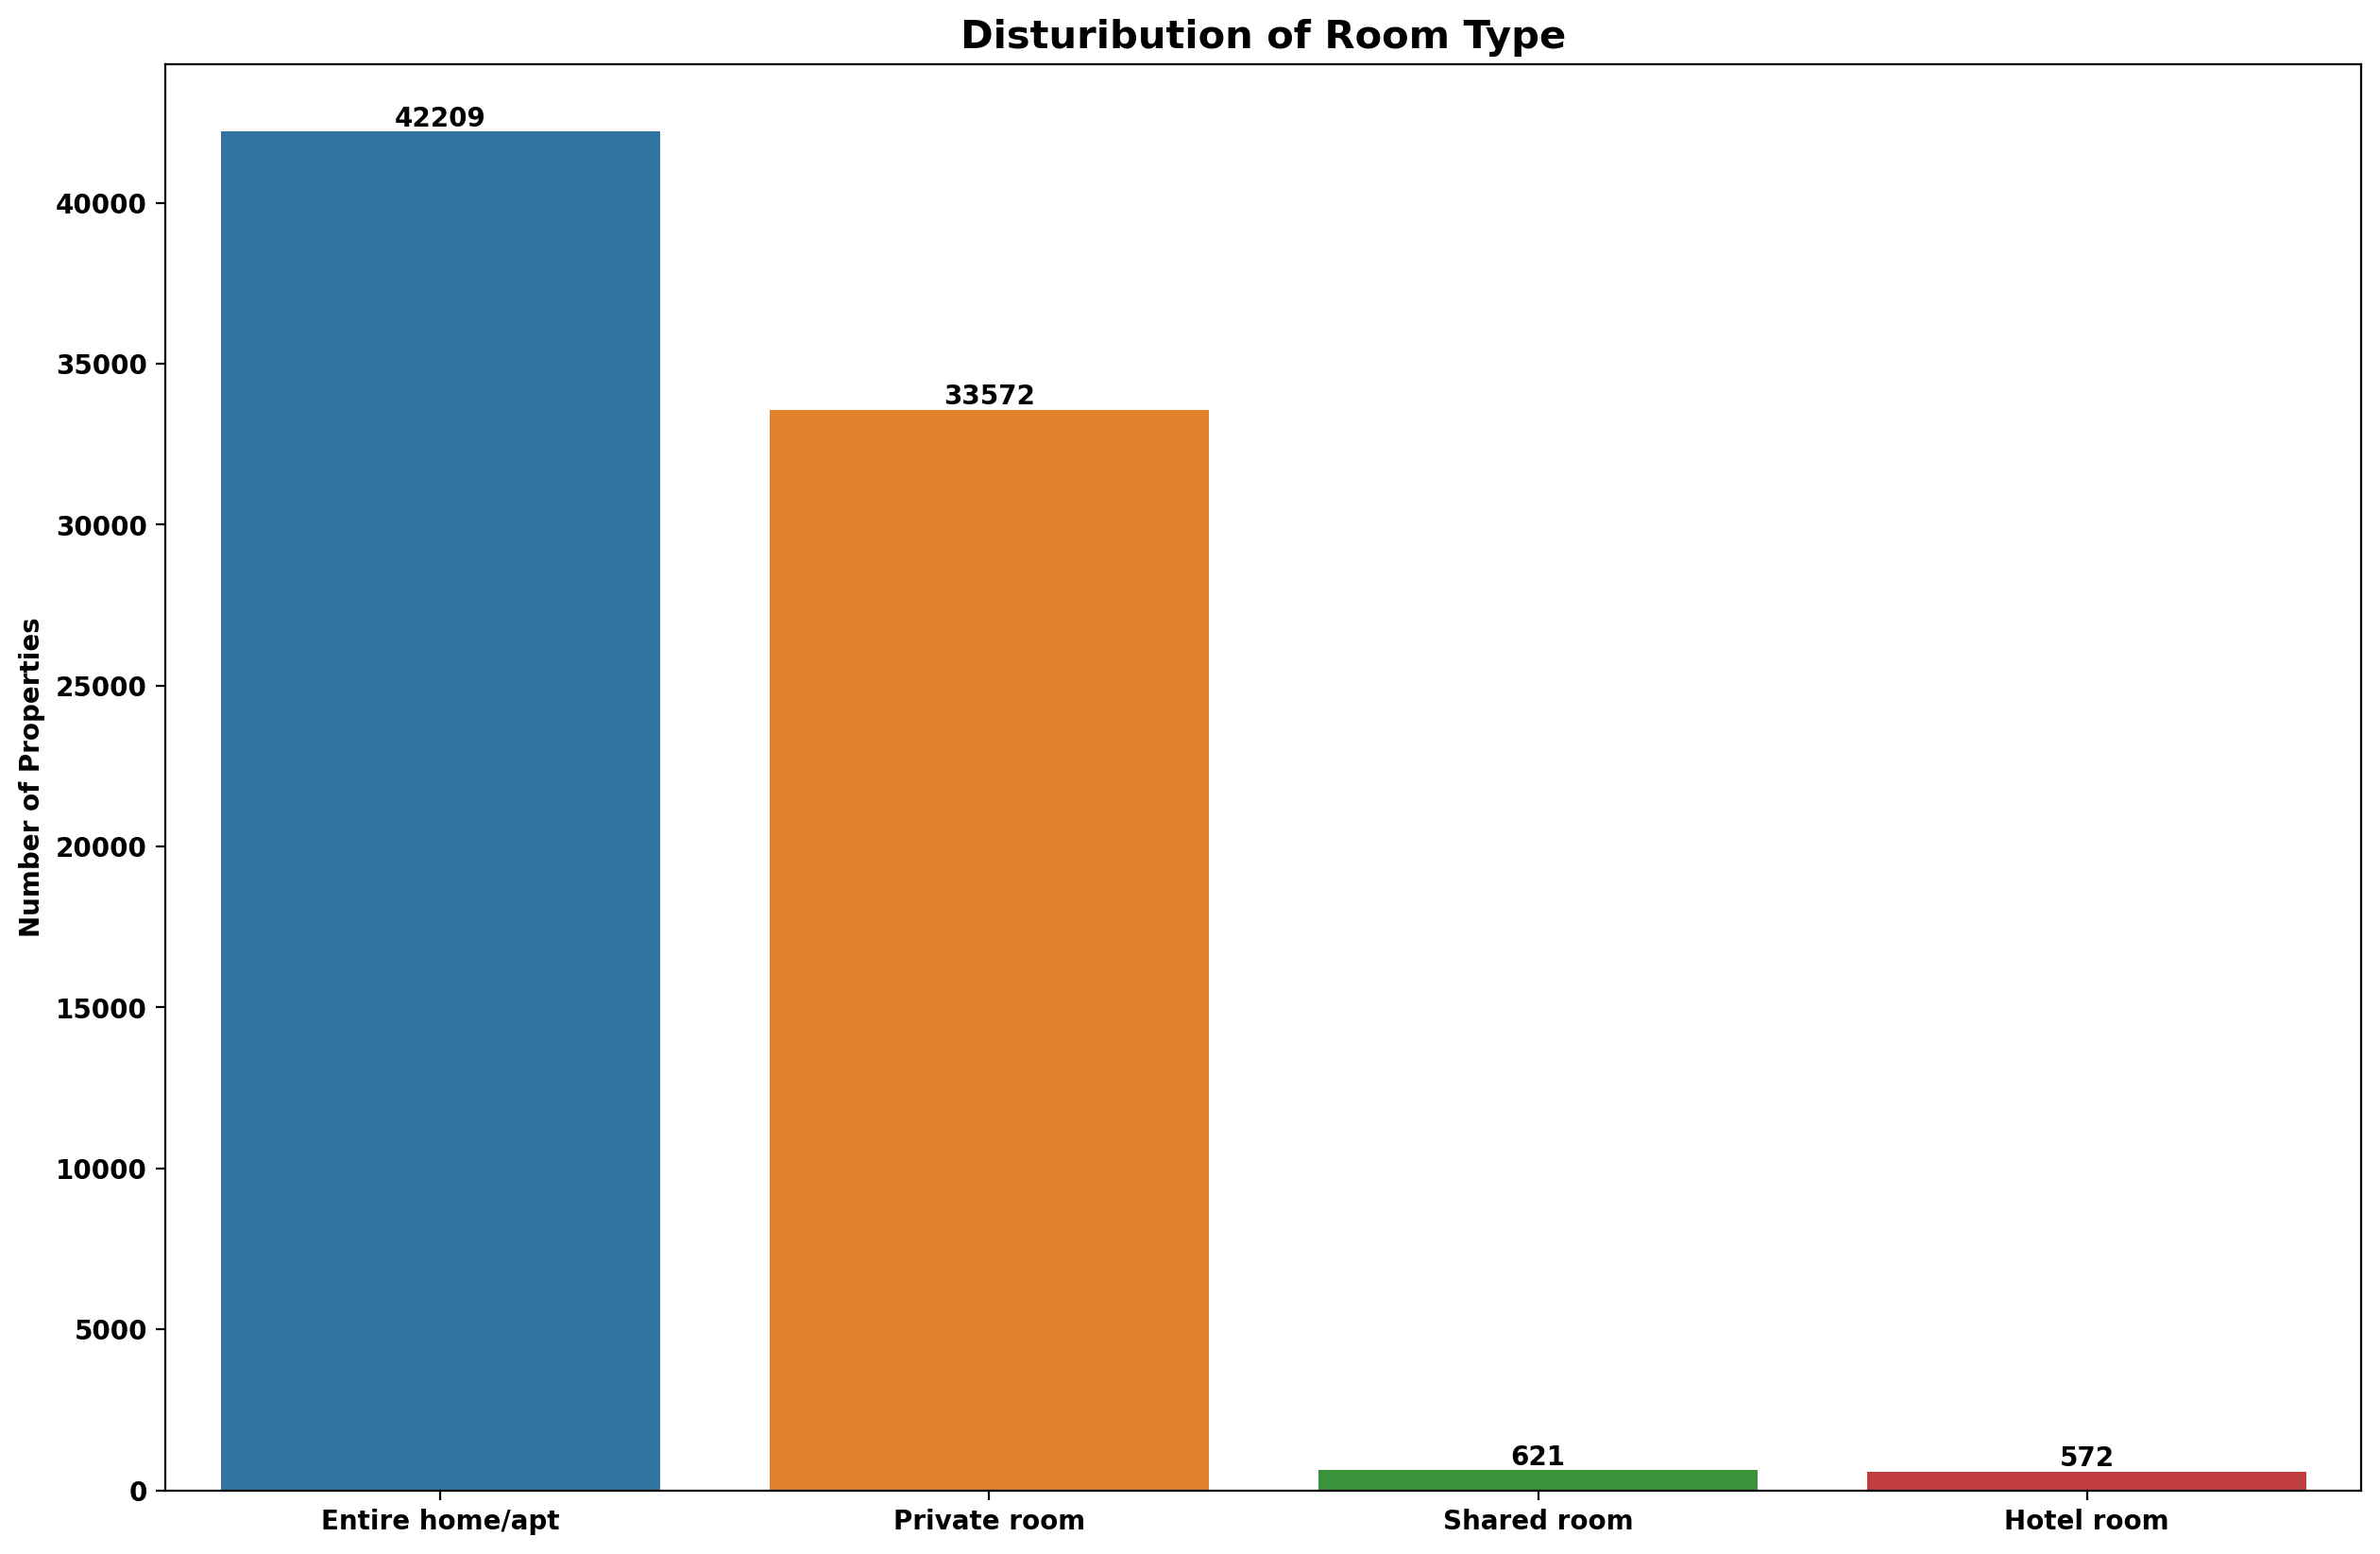

In [13]:
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="room_type", y="count", data=room_type_group_count)
plt.title("Disturibution of Room Type", weight="bold", c="black", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Number of Properties",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold",
                    color= 'black')

plt.show()

In [14]:
borough_group_count = listings.groupby("neighbourhood").id.count().sort_values(ascending=False)
borough_group_count = borough_group_count.reset_index()
borough_group_count.rename(columns={"id":"count"}, inplace=True)
borough_group_count["percentage"]=round(borough_group_count["count"]/borough_group_count["count"].sum()*100,2)
borough_group_count.head(10)

neighbourhood  count  percentage
0             Westminster   8576       11.14
1           Tower Hamlets   6830        8.87
2                 Hackney   5718        7.43
3  Kensington and Chelsea   5328        6.92
4                  Camden   5258        6.83
5               Islington   4489        5.83
6                 Lambeth   4405        5.72
7               Southwark   4329        5.62
8              Wandsworth   3943        5.12
9  Hammersmith and Fulham   3577        4.65

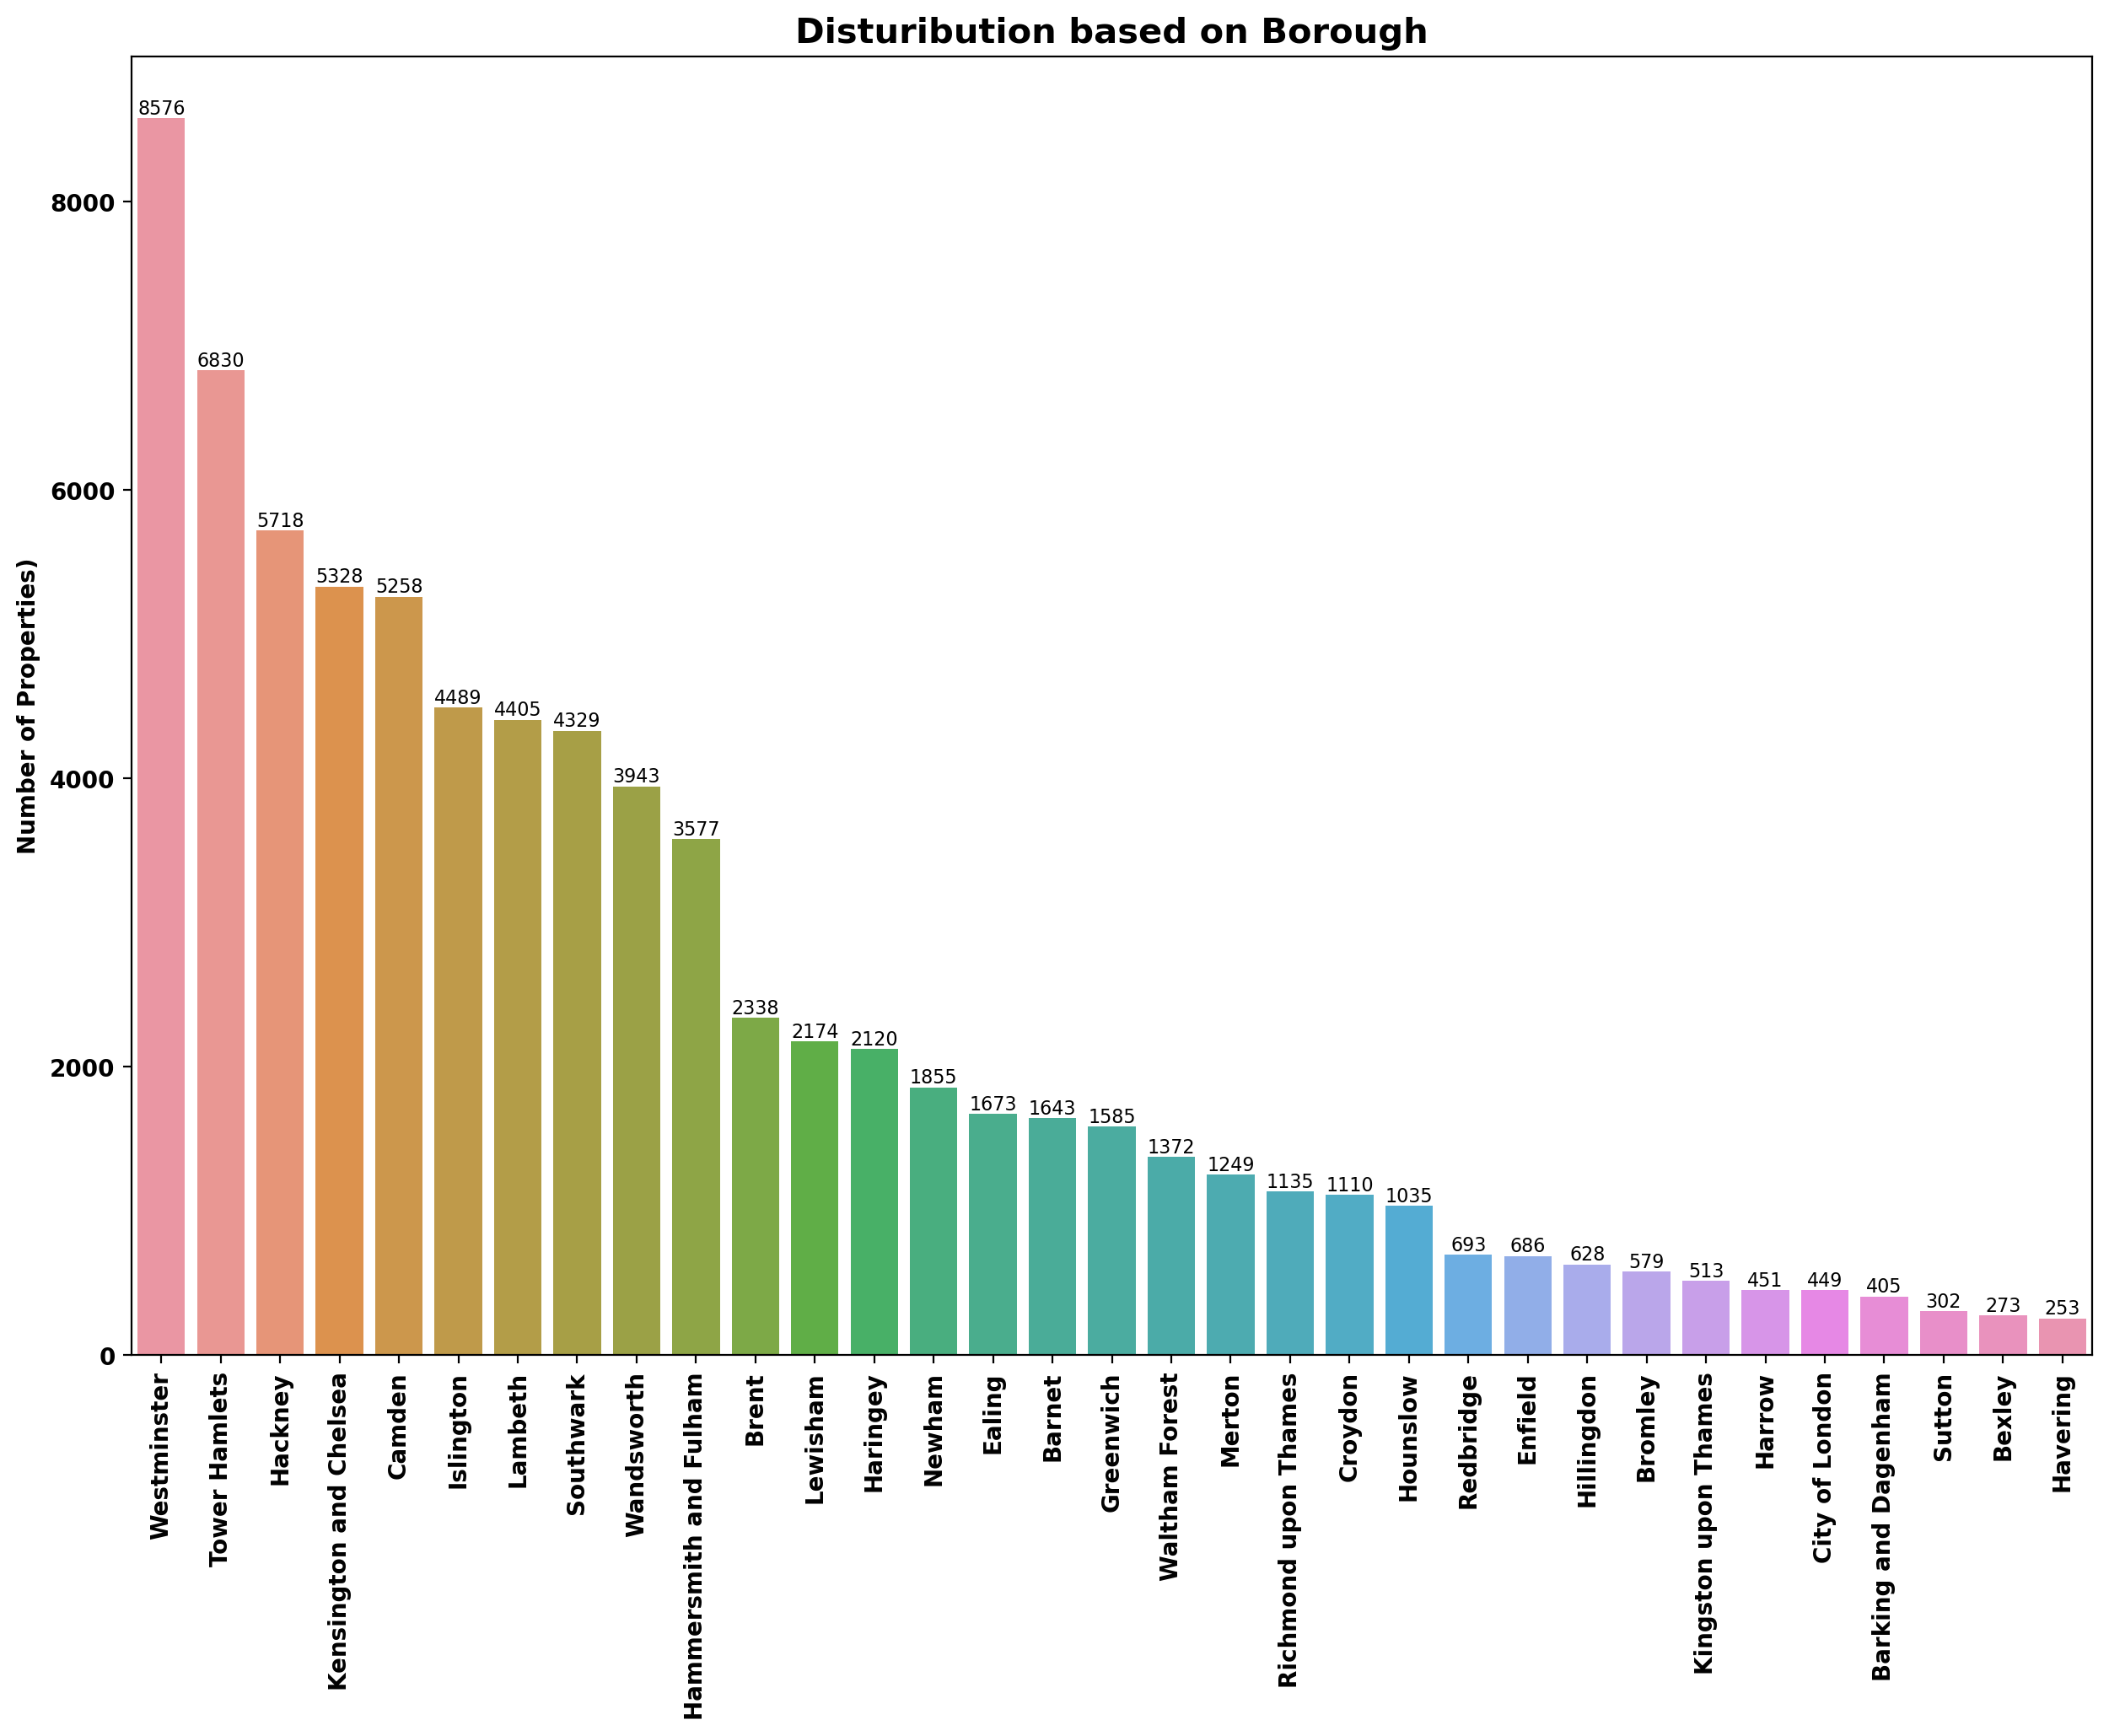

In [15]:
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="neighbourhood", y="count", data=borough_group_count)
plt.title("Disturibution based on Borough", weight="bold", c="black", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties)",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8)

plt.show()

In [16]:
borough_group_price = listings.groupby("neighbourhood").price.mean().sort_values(ascending=False)
borough_group_price = borough_group_price.reset_index()
borough_group_price.head()

neighbourhood       price
0          City of London  295.906459
1             Westminster  184.018890
2  Kensington and Chelsea  172.895270
3               Islington  126.861885
4                  Camden  123.716052

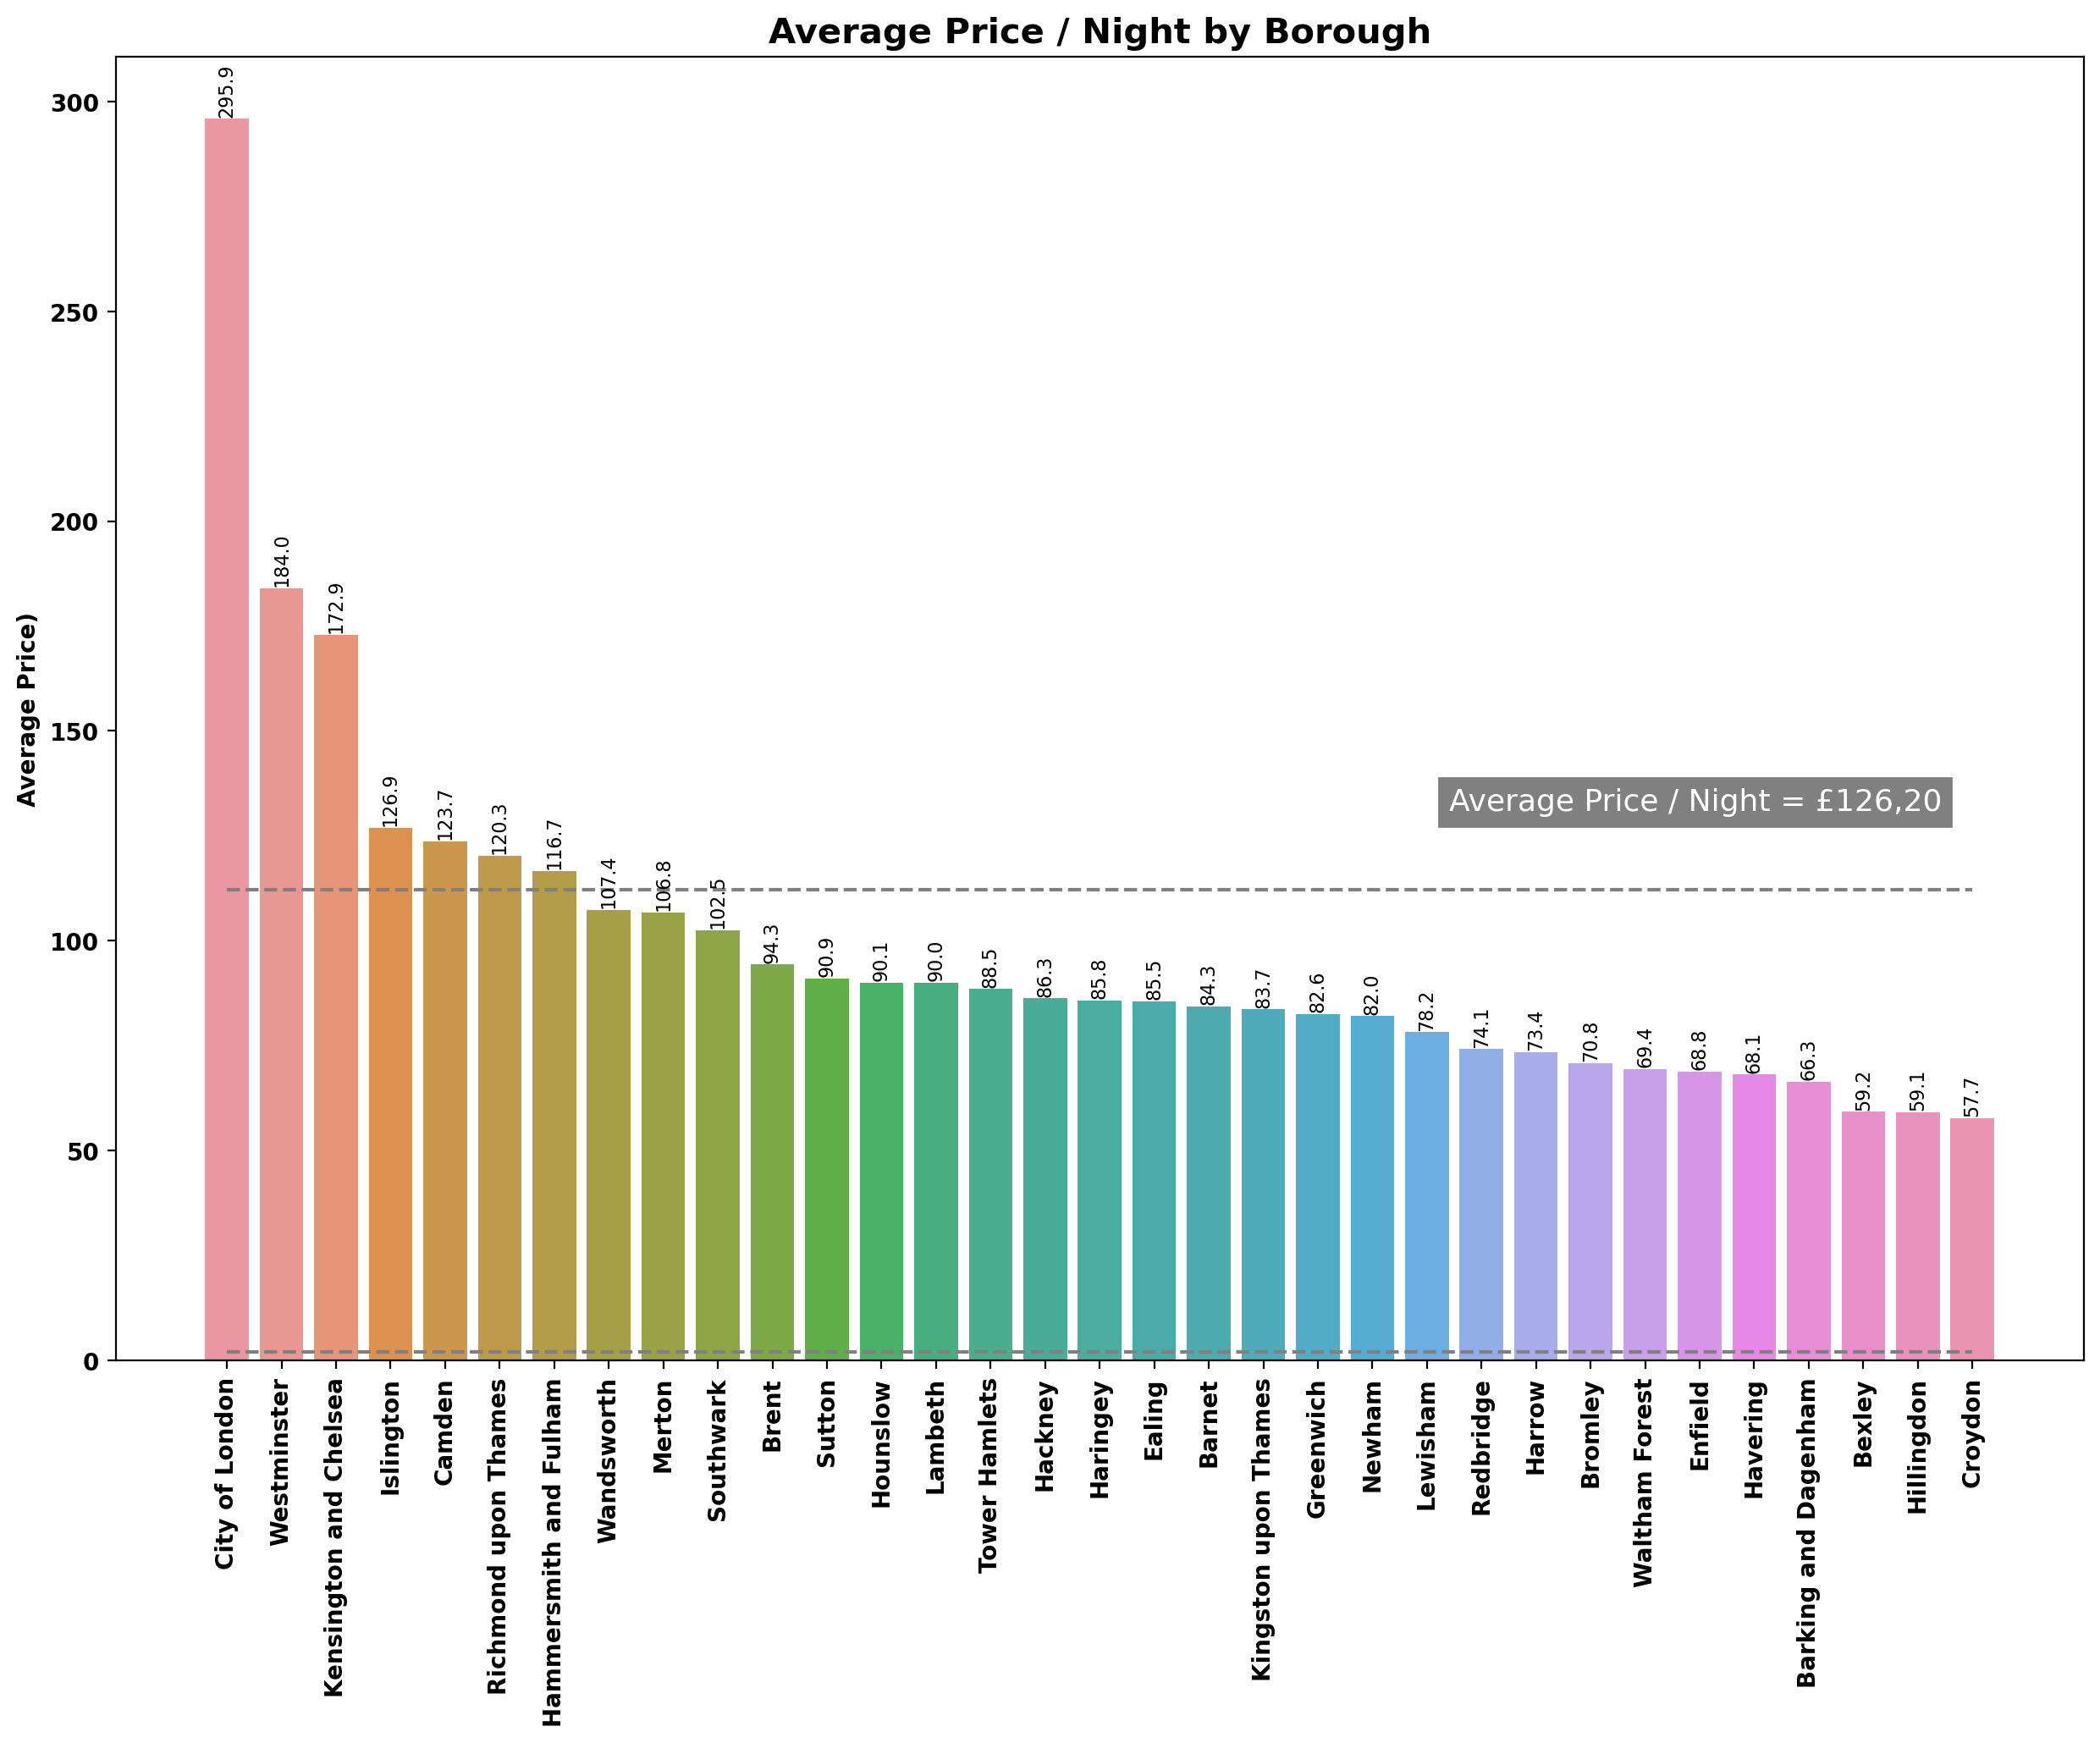

In [17]:
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="neighbourhood", y="price", data=borough_group_price)
plt.title("Average Price / Night by Borough", weight="bold", c="black", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Average Price)",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.5),
                    ha='center', va='bottom',
                    color= 'black', size=8, rotation=90)

x_coordinates = [0, 32]
y_median = [(listings.price.mean(),2), (listings.price.mean(),2)]

plt.plot(x_coordinates, y_median,linestyle = '--', c="gray")
plt.text(22.4,131,'Average Price / Night = £126,20',fontsize = 13,backgroundcolor = 'gray',color = 'white')



plt.show()

In [18]:
borough_group_reviews = listings.groupby("neighbourhood").number_of_reviews.sum().sort_values(ascending=False)
borough_group_reviews = borough_group_reviews.reset_index()
borough_group_reviews["percentage"] = round(borough_group_reviews["number_of_reviews"] / borough_group_reviews["number_of_reviews"].sum()*100,2)
borough_group_reviews.head()

neighbourhood  number_of_reviews  percentage
0             Westminster             144183       12.02
1                  Camden             102390        8.53
2           Tower Hamlets             100555        8.38
3                 Lambeth              86037        7.17
4  Kensington and Chelsea              83787        6.98

In [23]:
# Property Type and Borough

property_type_borough = listings.groupby(["neighbourhood","room_type"]).count().reset_index()
property_type_borough = property_type_borough.pivot("room_type","neighbourhood","id")
property_type_borough


neighbourhood    Barking and Dagenham  Barnet  Bexley   Brent  Bromley  \
room_type                                                                
Entire home/apt                 122.0   685.0    80.0  1112.0    233.0   
Hotel room                        NaN    32.0     2.0    17.0      1.0   
Private room                    279.0   910.0   188.0  1187.0    339.0   
Shared room                       4.0    16.0     3.0    22.0      6.0   

neighbourhood    Camden  City of London  Croydon  Ealing  Enfield  ...  \
room_type                                                          ...   
Entire home/apt  3431.0           393.0    398.0   642.0    222.0  ...   
Hotel room         68.0             4.0      2.0     6.0     22.0  ...   
Private room     1719.0            50.0    700.0  1013.0    438.0  ...   
Shared room        40.0             2.0     10.0    12.0      4.0  ...   

neighbourhood    Merton  Newham  Redbridge  Richmond upon Thames  Southwark  \
room_type                                                                     
Entire home/apt   559.0   678.0      207.0                 623.0     2324.0   
Hotel room          NaN     7.0        1.0                   5.0       11.0   
Private room      678.0  1145.0      474.0                 504.0     1961.0   
Shared room        12.0    25.0       11.0                   3.0       33.0   

neighbourhood    Sutton  Tower Hamlets  Waltham Forest  Wandsworth  \
room_type                                                            
Entire home/apt    99.0         3225.0           609.0      2194.0   
Hotel room          NaN           31.0             5.0         7.0   
Private room      201.0         3511.0           742.0      1729.0   
Shared room         2.0           63.0            16.0        13.0   

neighbourhood    Westminster  
room_type                     
Entire home/apt       6265.0  
Hotel room              81.0  
Private room          2173.0  
Shared room             57.0  

[4 rows x 33 columns]

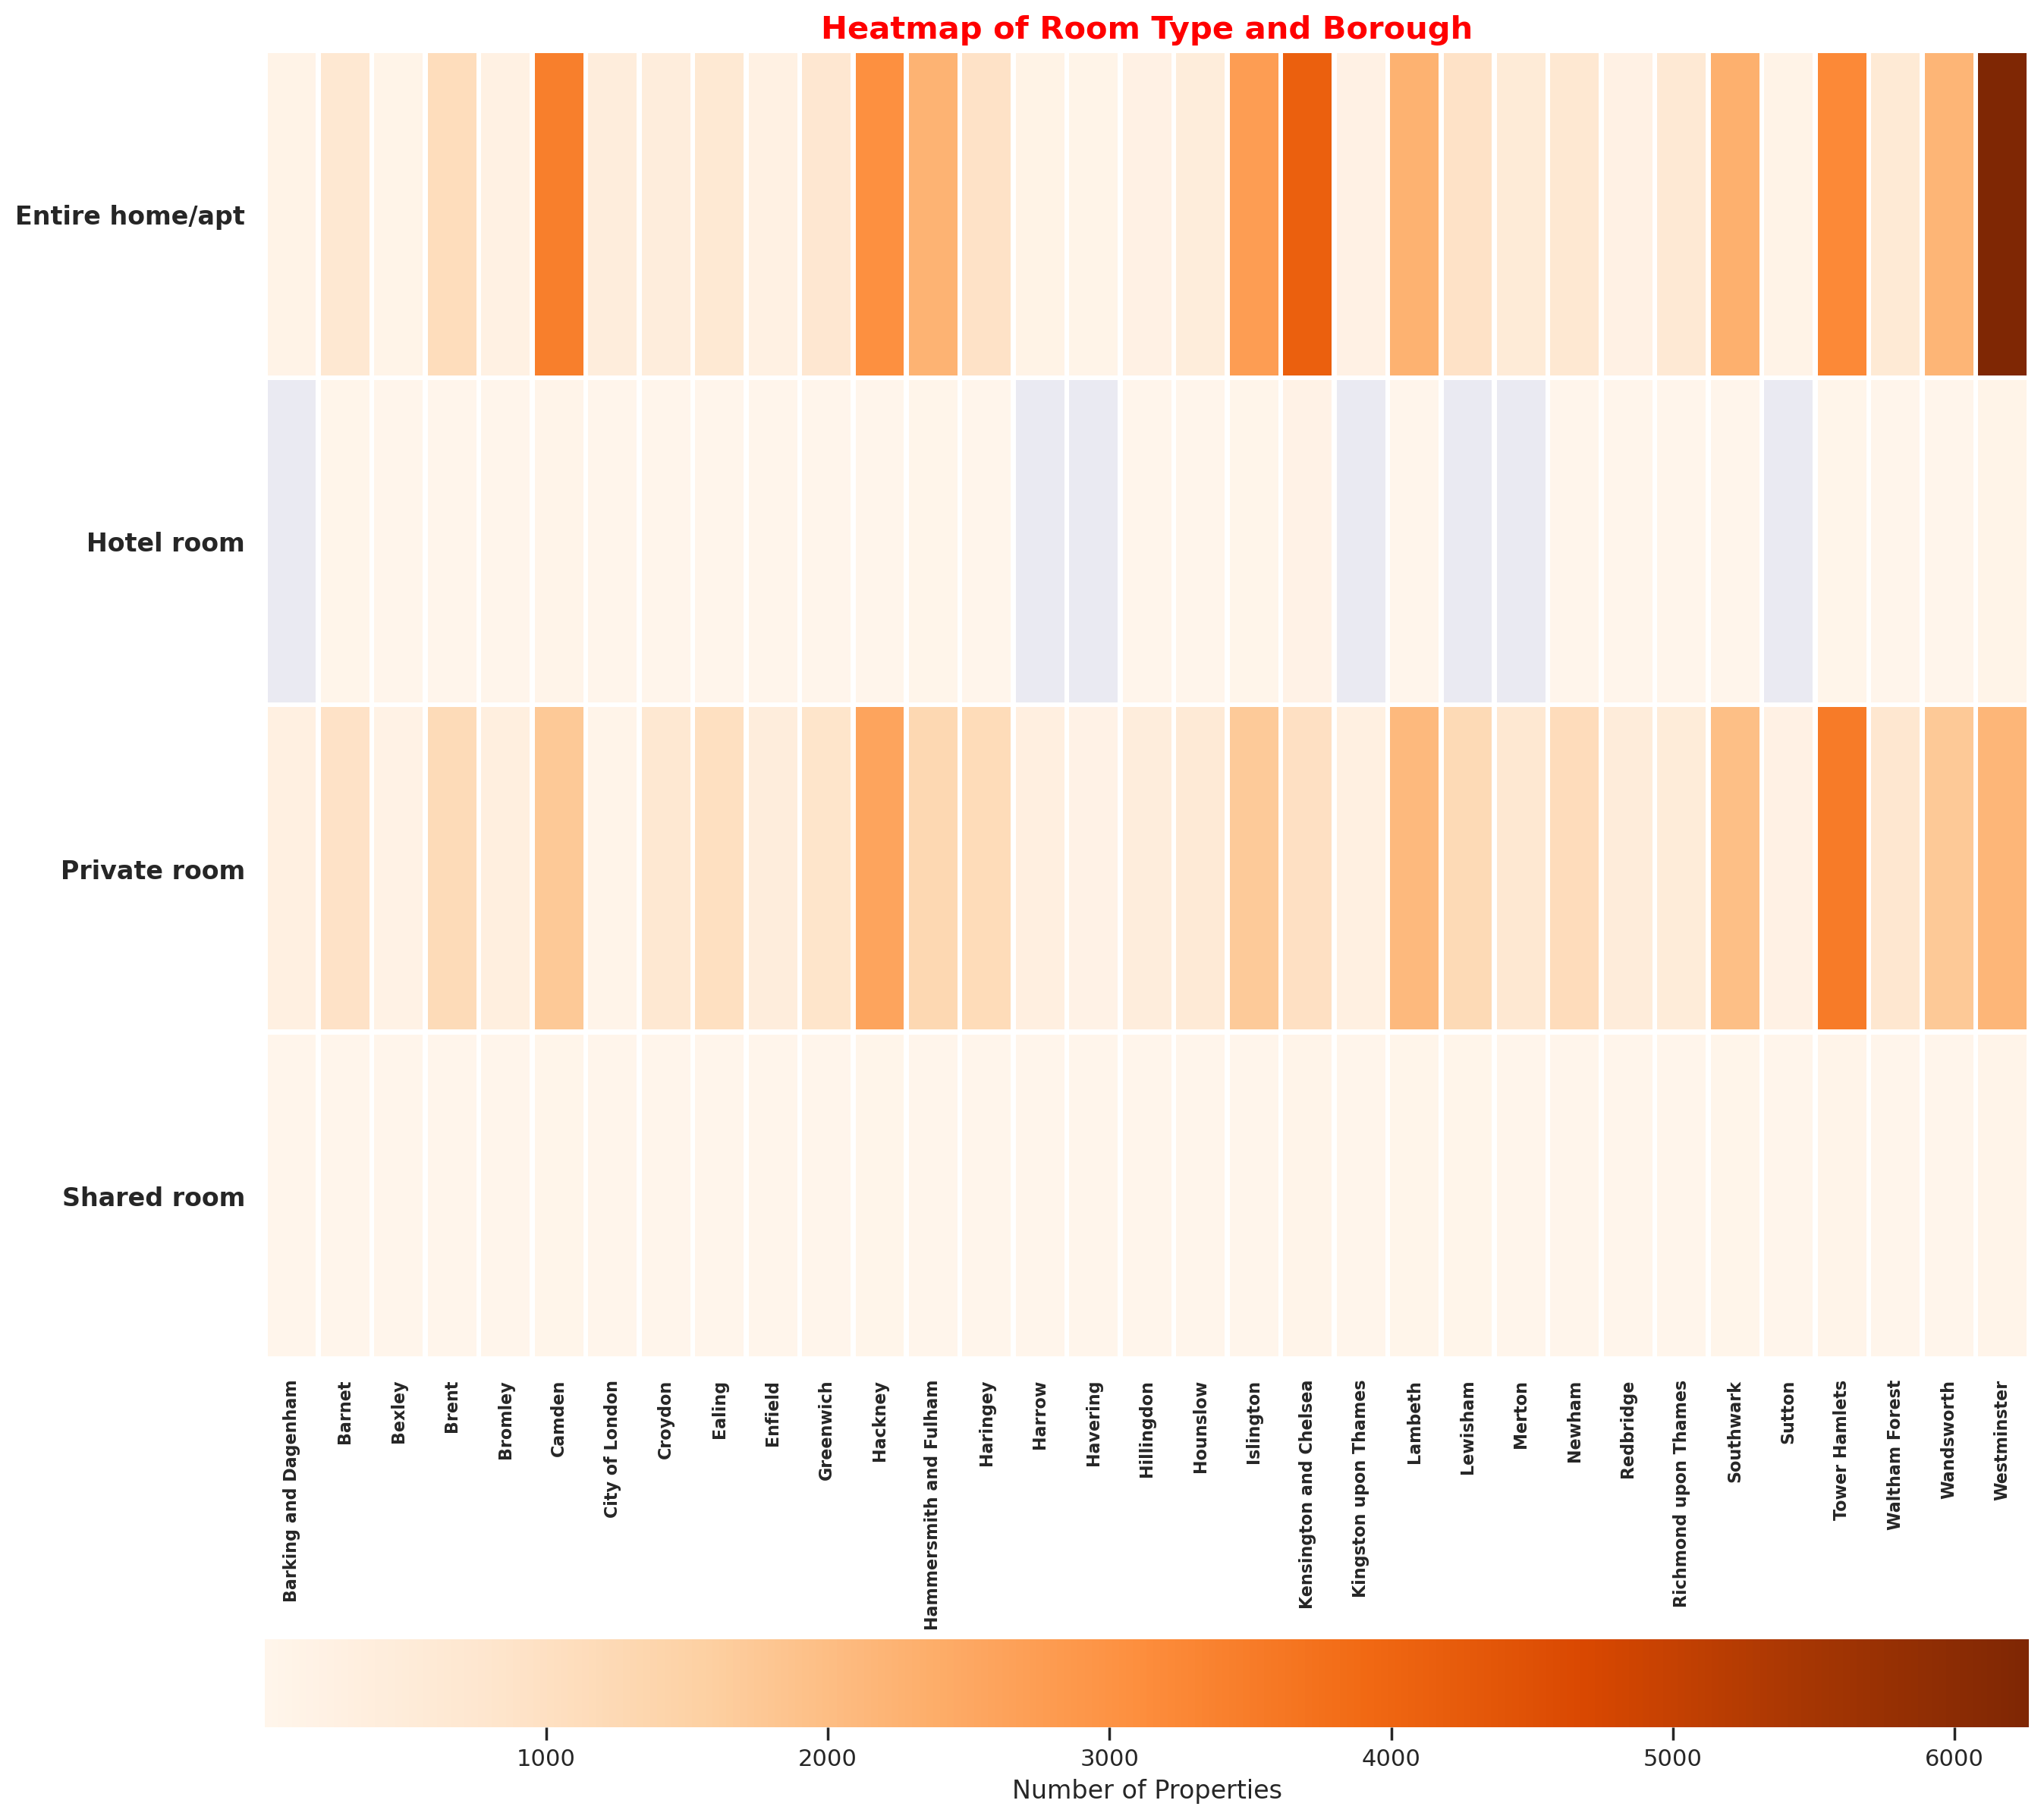

In [24]:

#Heatmap of Property Type and Borough

plt.figure(figsize=(15,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(property_type_borough,annot=False,fmt="d", linewidths=2, cmap="Oranges",cbar_kws={'label': 'Number of Properties','orientation':'horizontal'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=12)
plt.xticks(weight="bold",rotation=90,size=8)
plt.title("Heatmap of Room Type and Borough",weight="bold",c="red", fontsize=15)
plt.show()

In [26]:
# Listing Per Host
listing_host = listings.host_id.value_counts().head(10).reset_index()
listing_host

index  host_id
0   33889201      878
1  137094377      283
2   13557337      279
3   48165024      267
4   28820321      242
5  224866971      152
6   27572615      143
7   50291093      118
8  228928499      114
9   10961046      111

In [28]:
#Distribution by host (most have)
listing_host_borough = listings[listings["host_id"]==33889201]
listing_host_borough.groupby(["neighbourhood"]).id.count().reset_index().sort_values("id",ascending=False).head()

neighbourhood   id
18              Wandsworth  128
11  Kensington and Chelsea  110
7   Hammersmith and Fulham  102
10               Islington   81
2                   Camden   78

In [30]:
#Availability Per Borough of 365 day

occupancy_borough = listings.groupby("neighbourhood").availability_365.mean().sort_values().reset_index()
occupancy_borough.head(10)

neighbourhood  availability_365
0                 Hackney         79.946485
1               Islington         89.018935
2              Wandsworth         92.113619
3                 Lambeth         95.088309
4               Southwark         95.282744
5                Haringey        102.170283
6                Lewisham        107.210672
7           Tower Hamlets        107.623280
8                  Merton        109.831065
9  Hammersmith and Fulham        113.211909

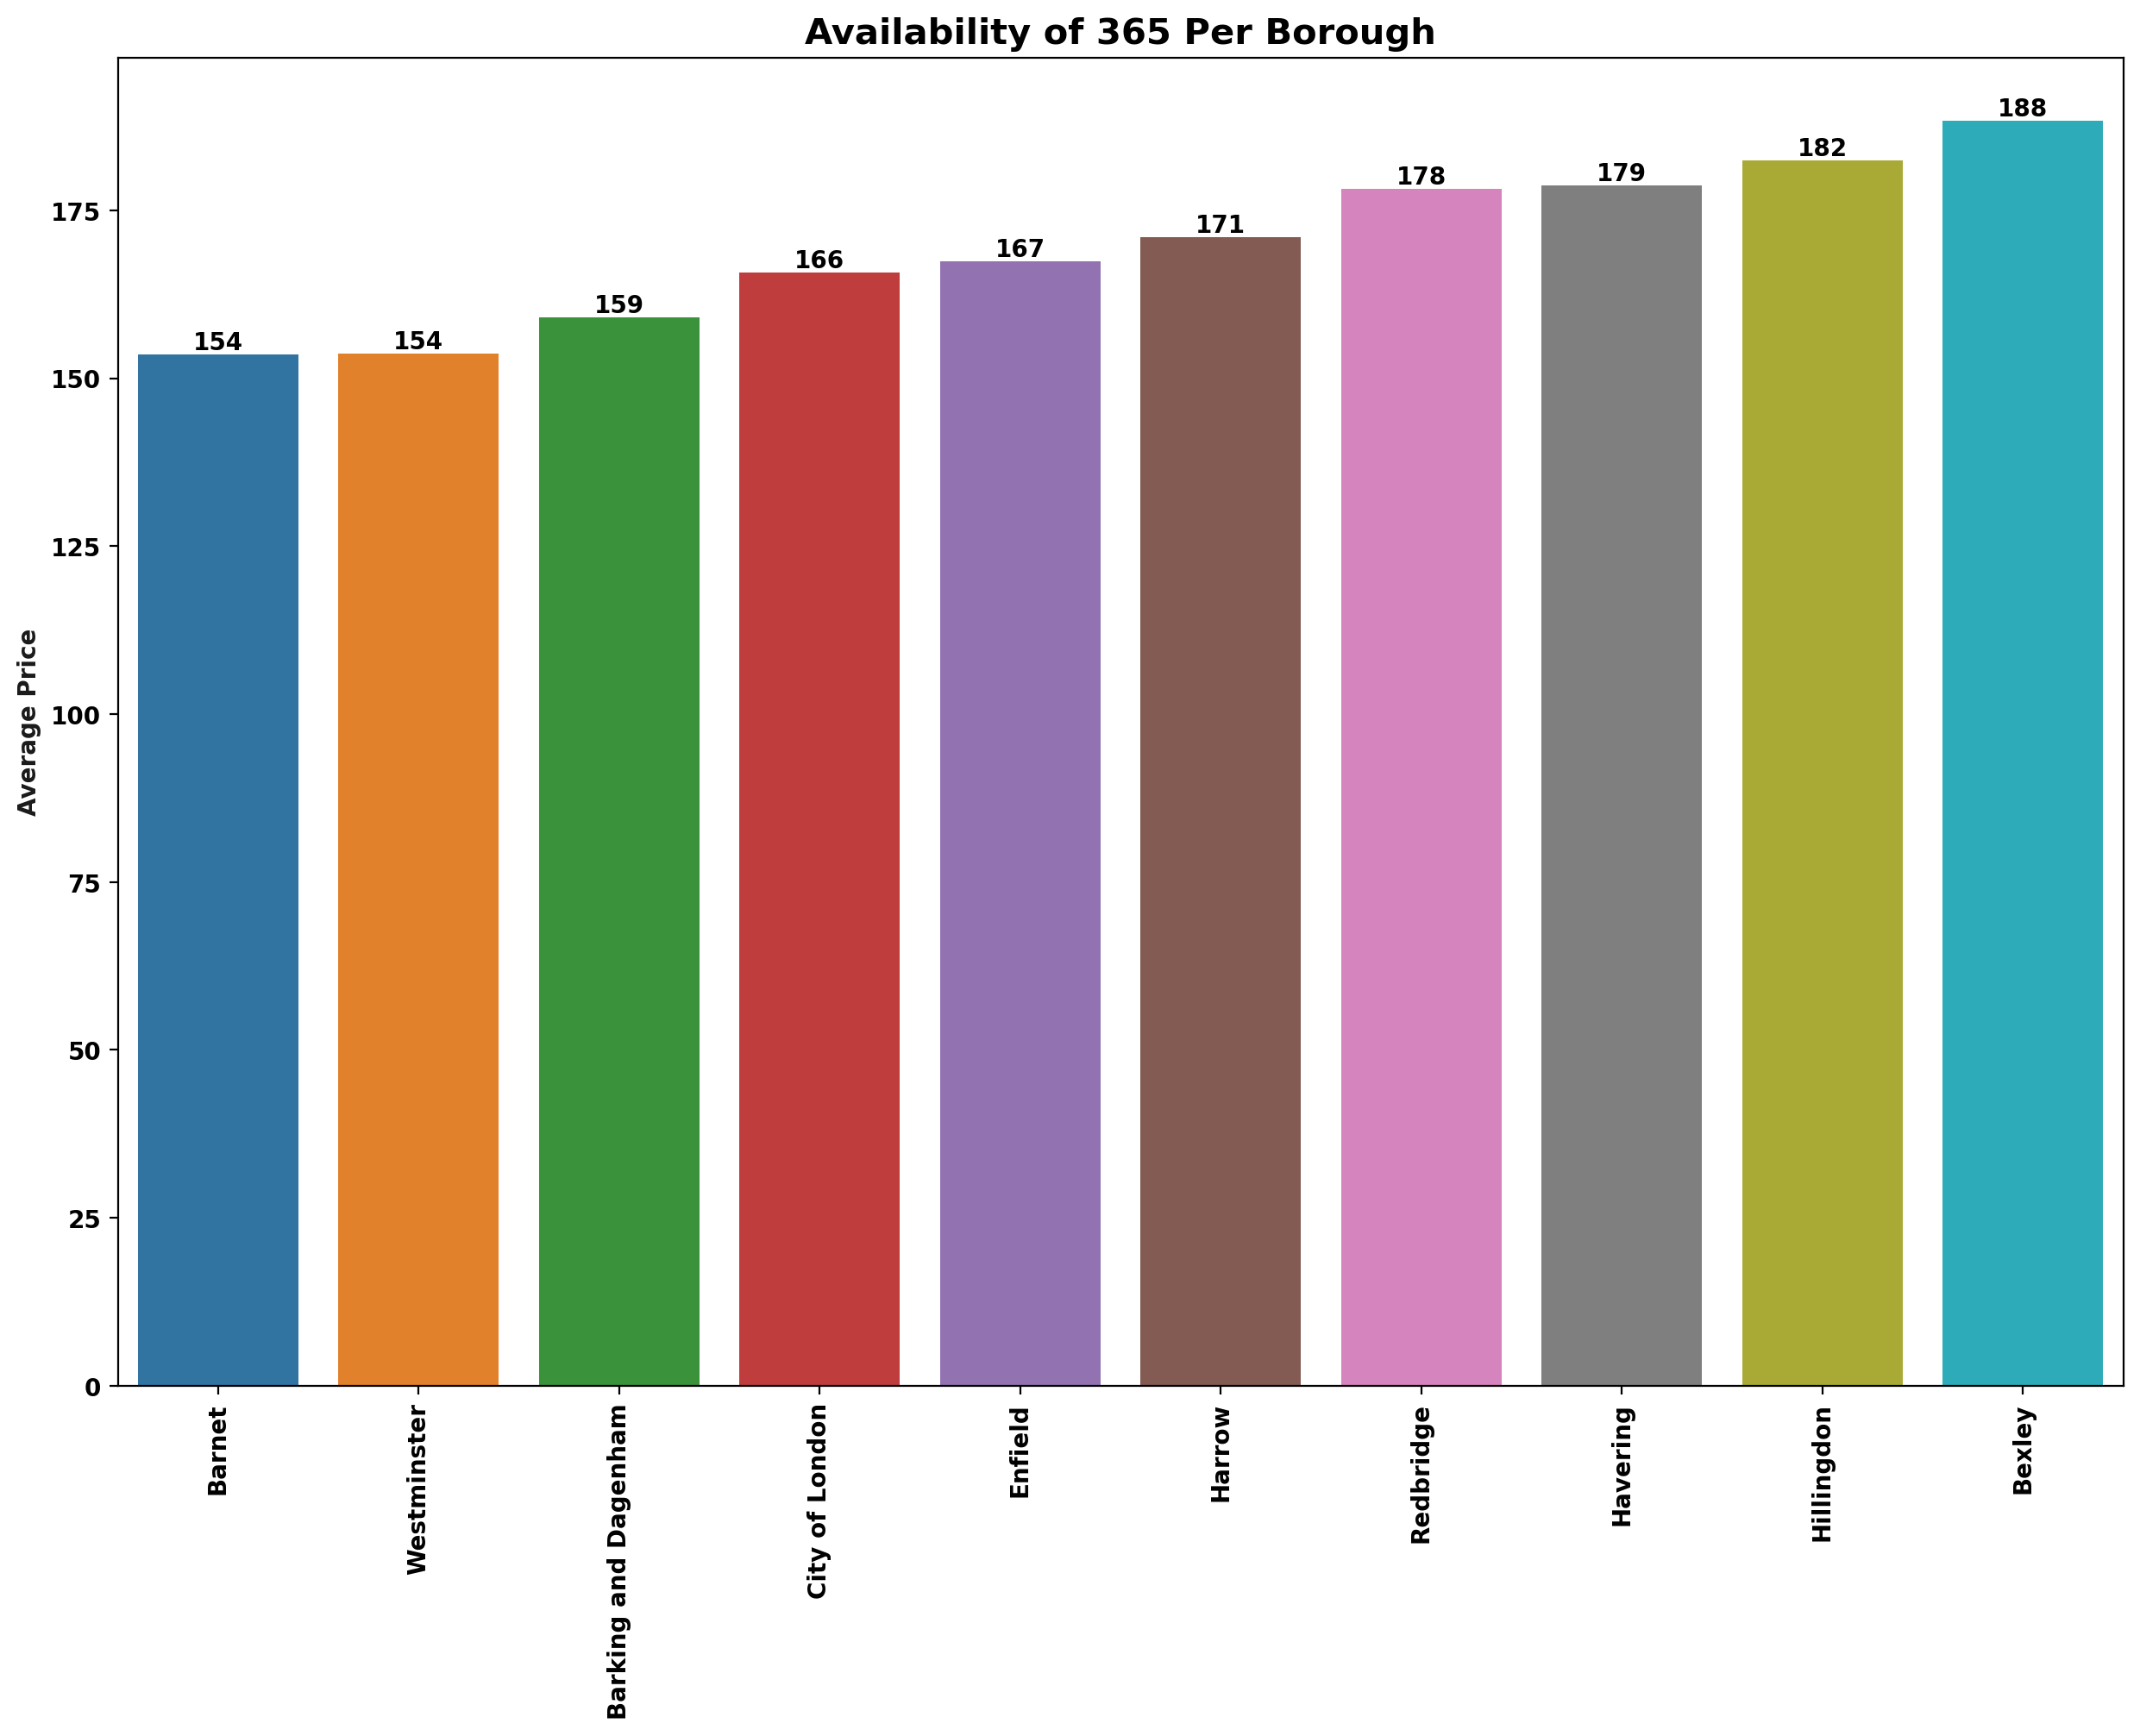

In [32]:
# Barplot of #Availability Per Borough
occupancy_borough = occupancy_borough.tail(10)
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="neighbourhood", y="availability_365", data=occupancy_borough)
plt.title("Availability of 365 Per Borough", weight="bold", c="black", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Average Price",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=10, weight="bold")

plt.show()

In [34]:
inner_london = ['Kensington and Chelsea', 'Westminster','Hammersmith and Fulham', 'Wandsworth','Hackney', 
                'Southwark','Tower Hamlets', 'Camden','Lambeth', 'Greenwich', 'City of London','Islington']

inner_london_filter=listings[listings["neighbourhood"].isin(inner_london)]
outer_london_filter=listings[~listings["neighbourhood"].isin(inner_london)]
print(len(inner_london_filter))
print(len(outer_london_filter))

54487
22487


In [35]:
# Group by Borough (Inner) for price

borough_group_price_inner = inner_london_filter.groupby("neighbourhood").price.mean().sort_values(ascending=False)
borough_group_price_inner = borough_group_price_inner.reset_index()
borough_group_price_inner.price.mean()


131.44029420846627

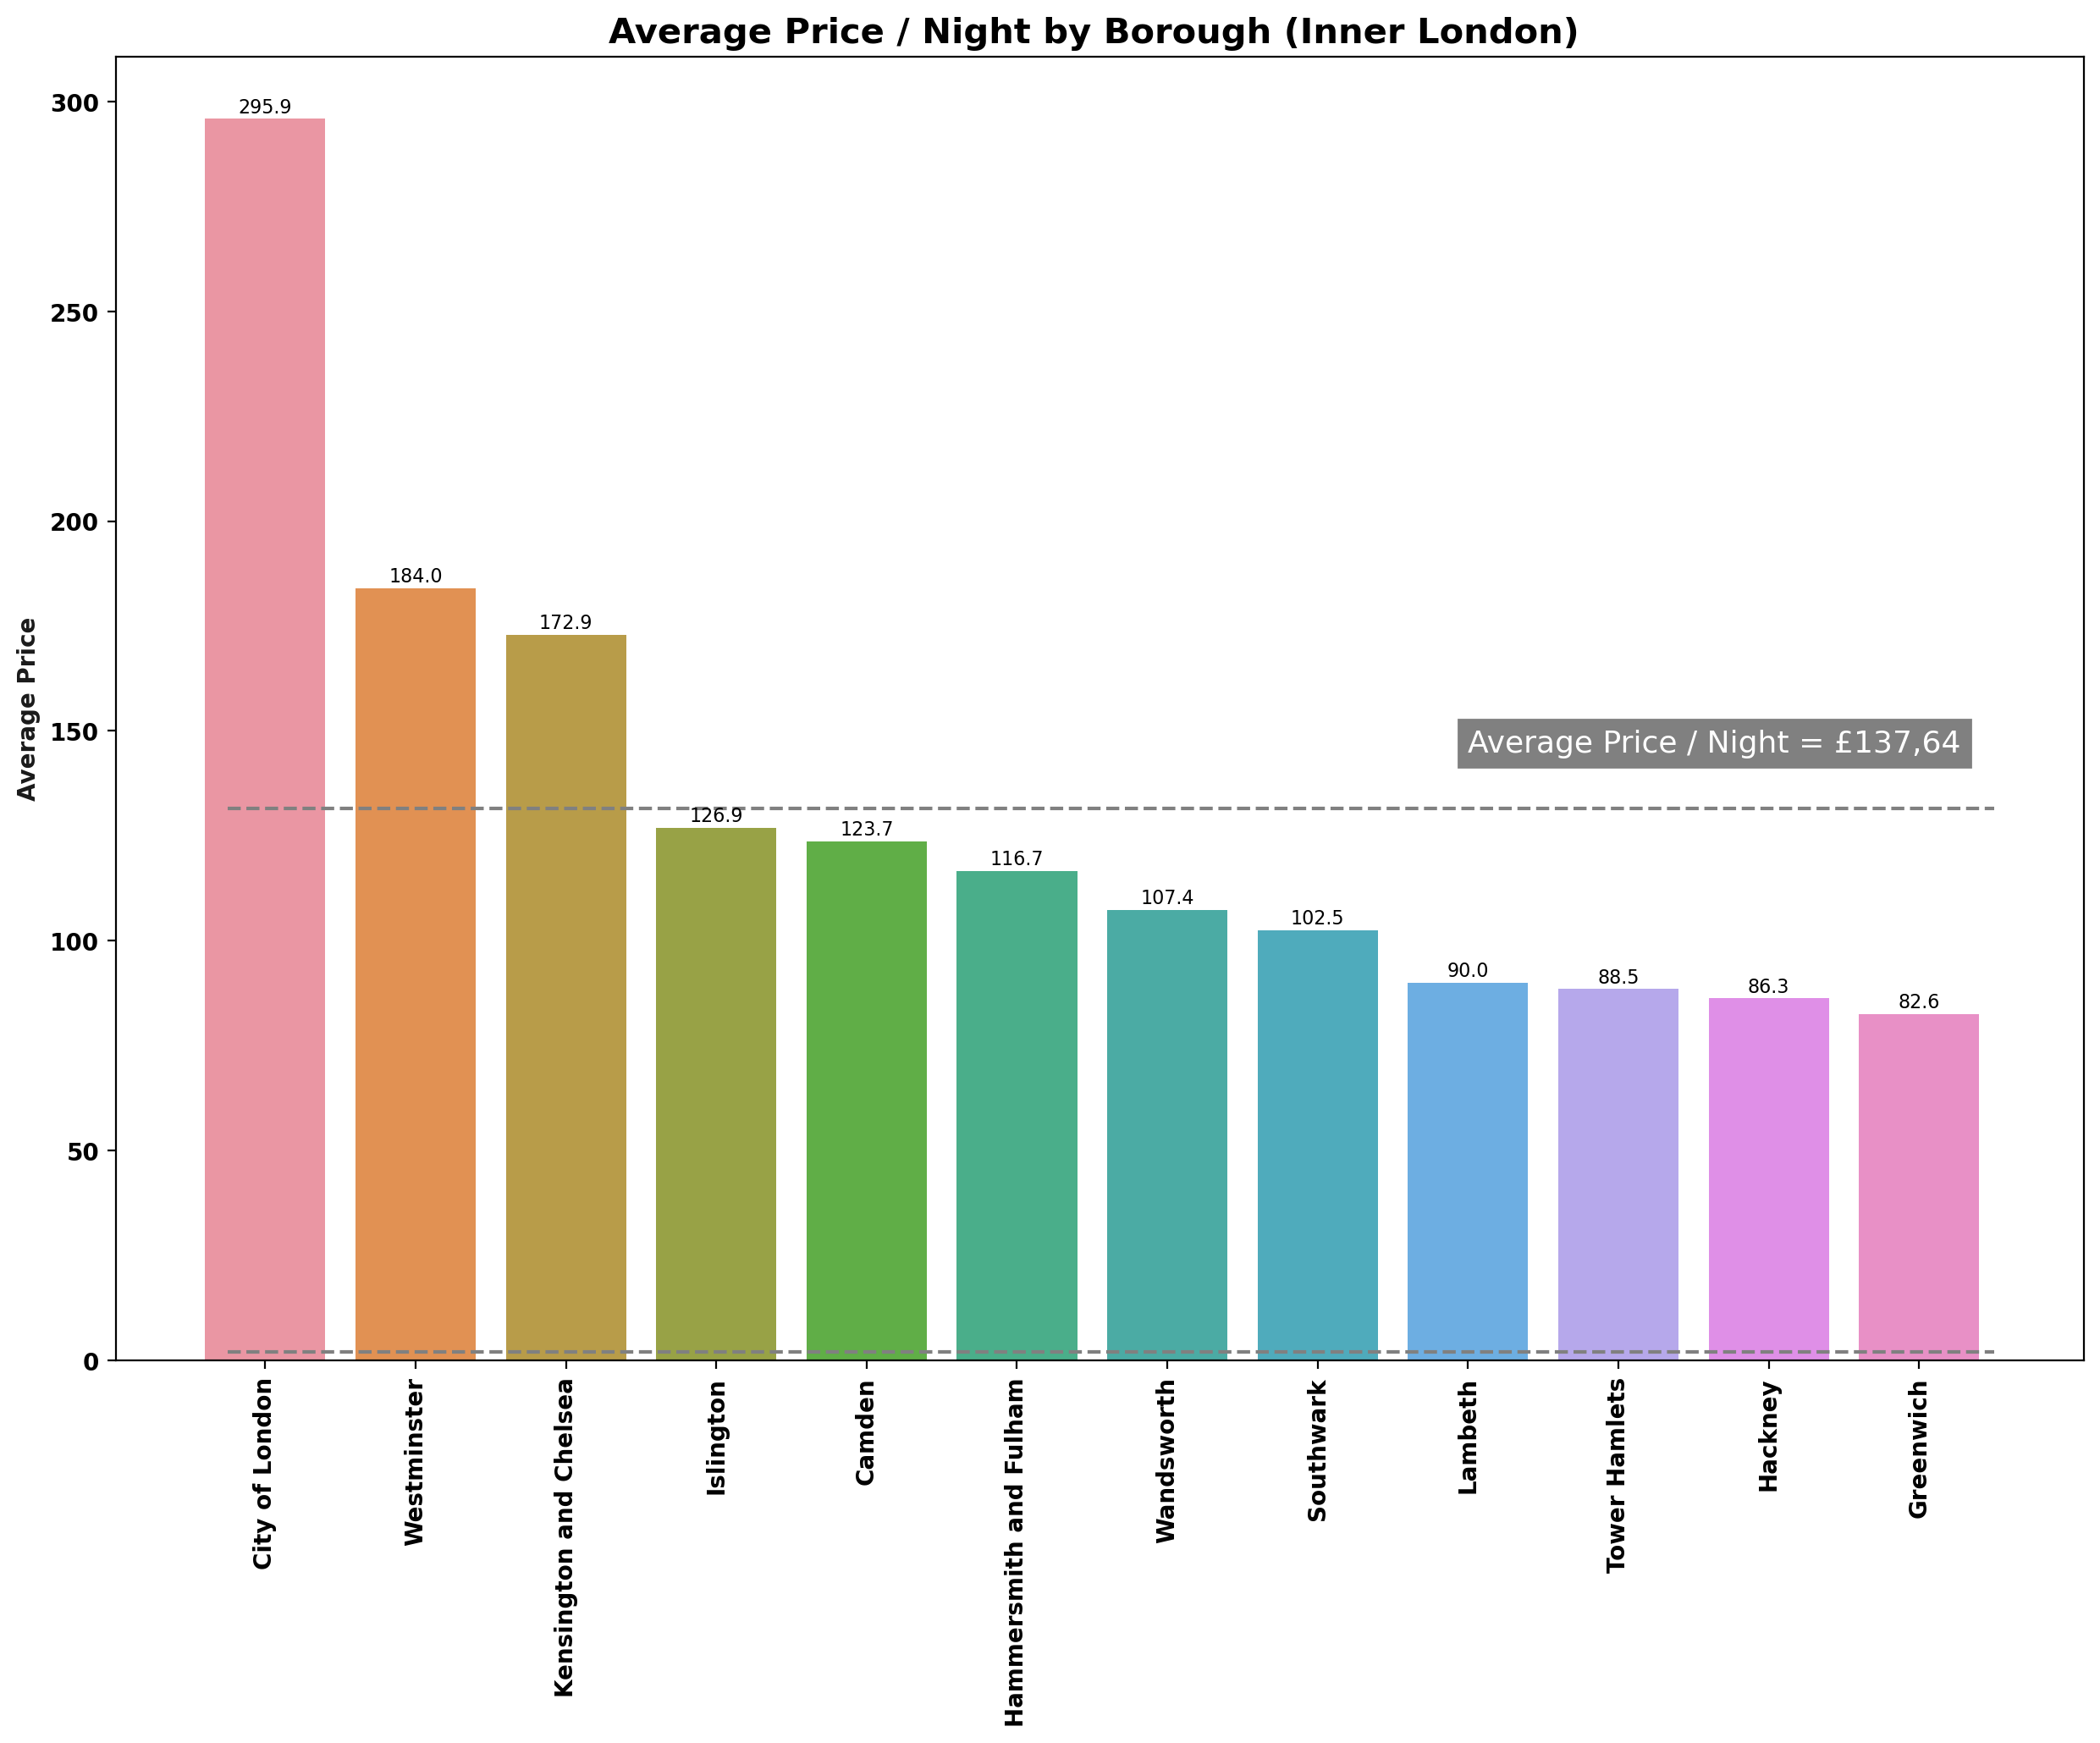

In [37]:
# Barplot of Inner Borough's Price/Night

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="neighbourhood", y="price", data=borough_group_price_inner)
plt.title("Average Price / Night by Borough (Inner London) ", weight="bold", c="black", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Average Price",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.5),
                    ha='center', va='bottom',
                    color= 'black', size=8, rotation=0)

x_coordinates_ = [-0.25, 11.5]
y_median_ = [(borough_group_price_inner.price.mean(),2), (borough_group_price_inner.price.mean(),2)]

plt.plot(x_coordinates_ , y_median_ ,linestyle = '--', c="gray")
plt.text(8,145,'Average Price / Night = £137,64',fontsize = 13,backgroundcolor = 'gray',color = 'white')

plt.show()

In [40]:
#Getting borough list
listings["neighbourhood"].unique()

array(['Lambeth', 'Islington', 'Kensington and Chelsea', 'Westminster',
       'Hammersmith and Fulham', 'Barnet', 'Hounslow',
       'Richmond upon Thames', 'Haringey', 'Hackney', 'Southwark',
       'Croydon', 'Tower Hamlets', 'Waltham Forest', 'Brent', 'Camden',
       'Newham', 'Redbridge', 'Merton', 'Lewisham', 'Wandsworth',
       'Bromley', 'Havering', 'Greenwich', 'Ealing', 'Enfield',
       'Barking and Dagenham', 'Hillingdon', 'Harrow',
       'Kingston upon Thames', 'Bexley', 'City of London', 'Sutton'],
      dtype=object)

In [41]:
inner_london = ['Kensington and Chelsea', 'Westminster','Hammersmith and Fulham', 'Wandsworth','Hackney', 
                'Southwark','Tower Hamlets', 'Camden','Lambeth', 'Greenwich', 'City of London','Islington']

inner_london_filter=listings[listings["neighbourhood"].isin(inner_london)]
outer_london_filter=listings[~listings["neighbourhood"].isin(inner_london)]
print(len(inner_london_filter))
print(len(outer_london_filter))

54487
22487


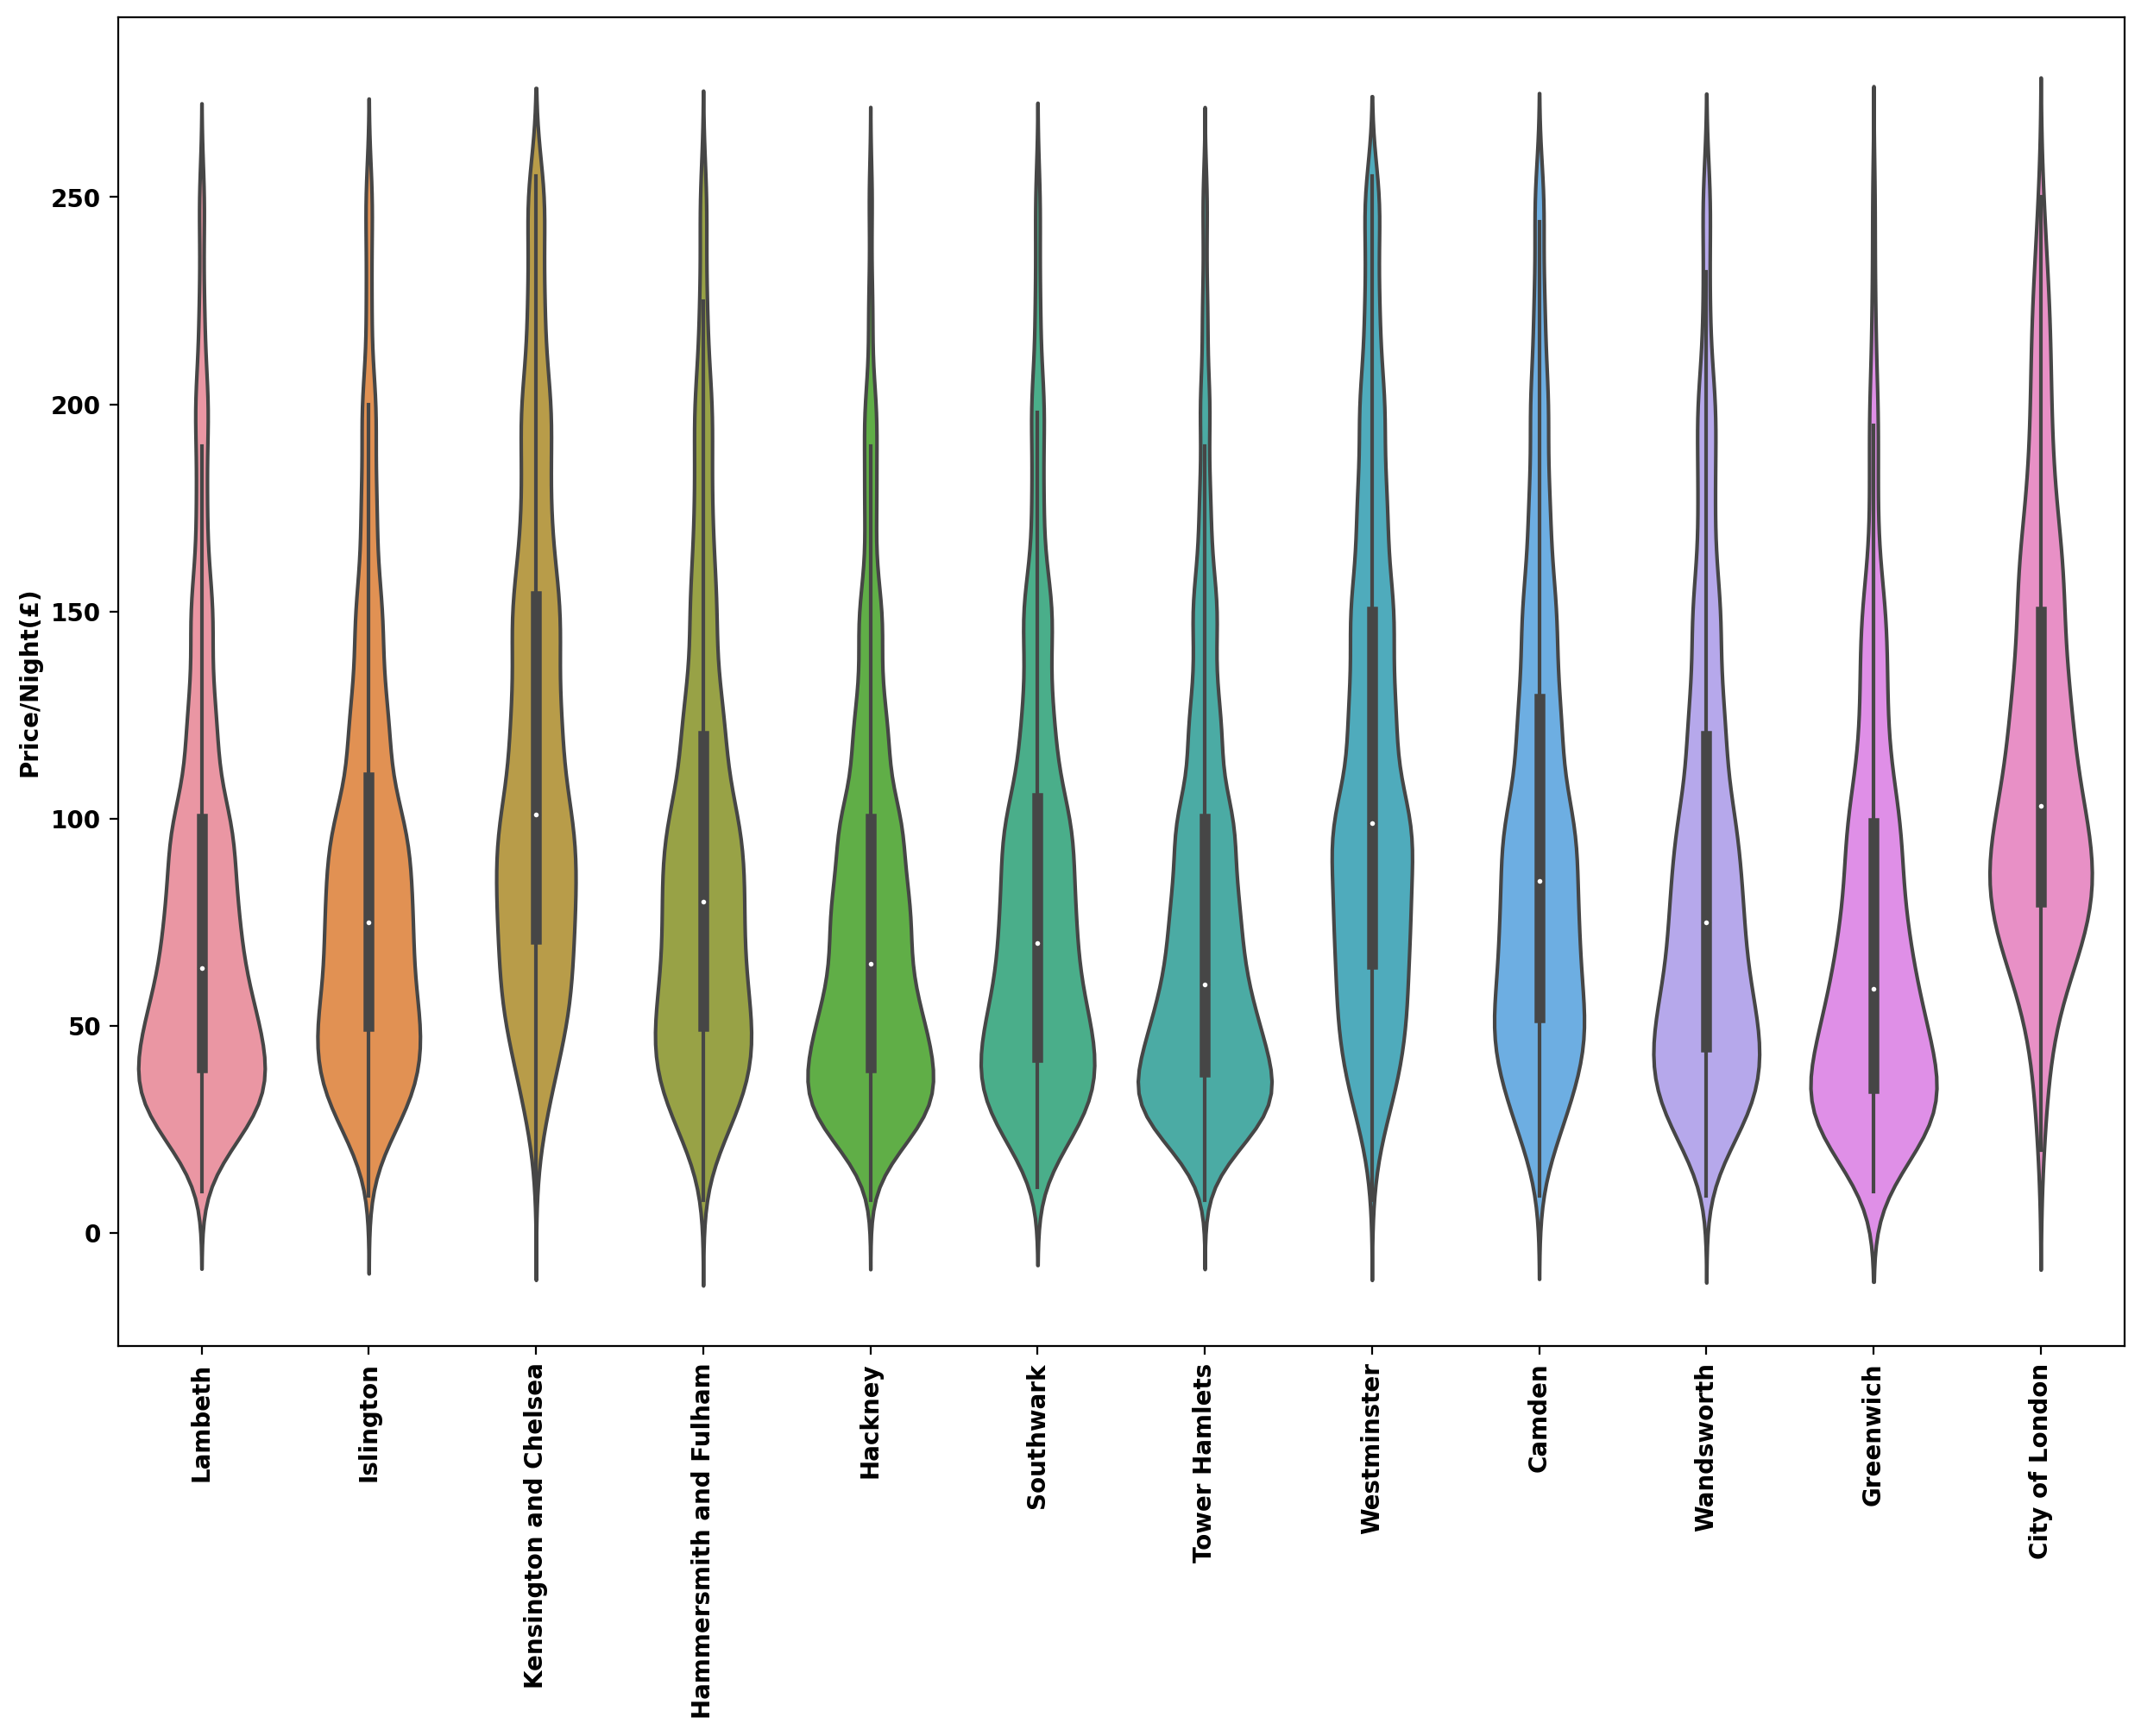

In [42]:
#Violinplot for Inner London Borough's Average Price
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
listing_price_filter = inner_london_filter[inner_london_filter["price"]<inner_london_filter.price.quantile(0.93)]
sns.violinplot(data=listing_price_filter, x='neighbourhood', y='price')
plt.xlabel("")
plt.ylabel("Price/Night(£)",weight="bold")
plt.yticks( weight="bold")
plt.xticks(rotation=90, weight="bold")
plt.show()

<Figure size 3000x2000 with 0 Axes>

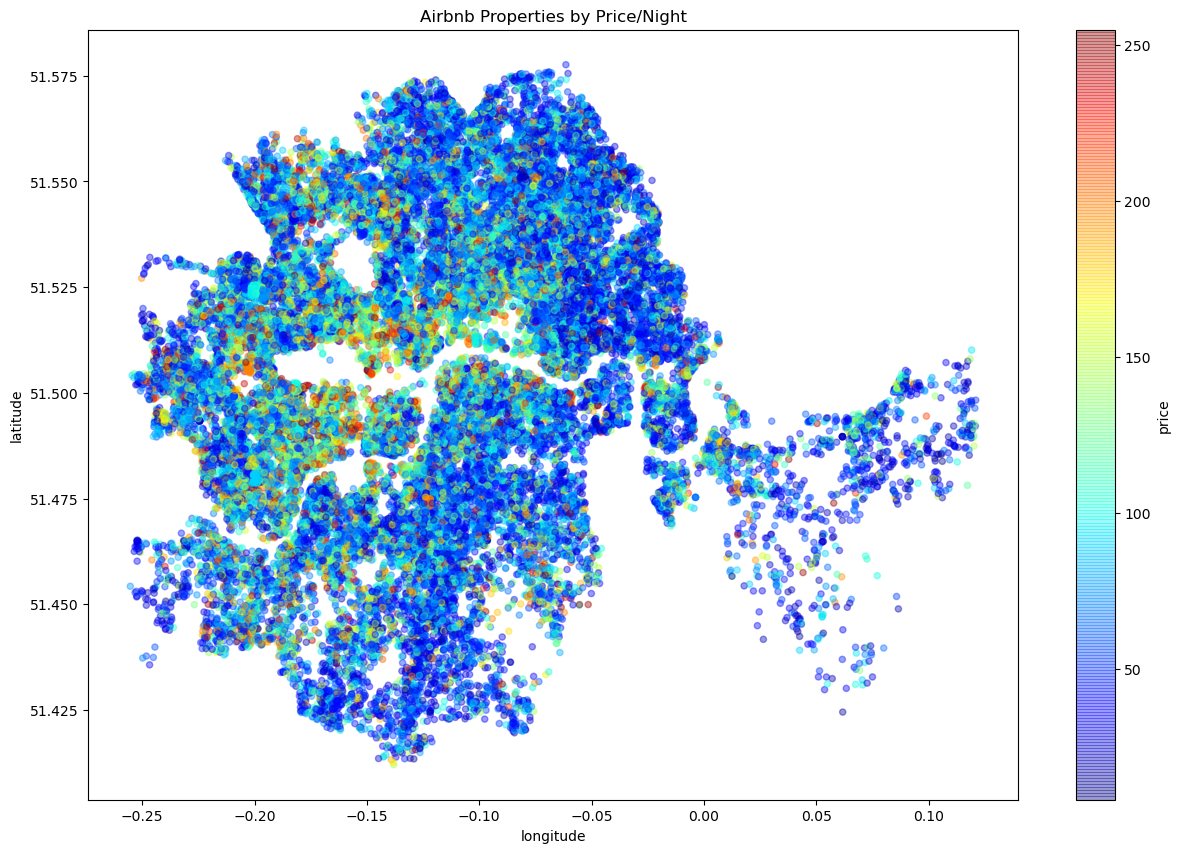

In [44]:
#Map for list Average Price

plt.figure(figsize=(15,10),dpi=200),

listing_map=listing_price_filter.plot(kind='scatter', x='longitude', y='latitude', c='price', 
                                      cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Airbnb Properties by Price/Night")

plt.show()

In [4]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV, cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score
import time

In [5]:
def gridsearch_with_output(estimator, parameter_grid, score, X_train, y_train):
    '''
        Parameters: estimator: the type of model (e.g. RandomForestRegressor())
                    paramter_grid: dictionary defining the gridsearch parameters
                    score: string or a callable to evalute the predictions
                    X_train: 2d numpy array
                    y_train: 1d numpy array
        Returns:  best parameters and model fit with those parameters
                  Also returns the best score
    '''
    model_gridsearch = GridSearchCV(estimator,
                                    parameter_grid,
                                    n_jobs=-1,
                                    verbose=True,
                                    scoring=score)
    model_gridsearch.fit(X_train, y_train)
    best_params = model_gridsearch.best_params_ 
    model_best = model_gridsearch.best_estimator_
    best_score = model_gridsearch.best_score_
    print("\nResult of gridsearch:")
    print("{0:<20s} | {1:<8s} | {2}".format("Parameter", "Optimal", "Gridsearch values"))
    print("-" * 55)
    for param, vals in parameter_grid.items():
        print("{0:<20s} | {1:<8s} | {2}".format(str(param), 
                                                str(best_params[param]),
                                                str(vals)))
    return best_params, model_best, best_score

def score_classifer(model, model_name, X_train, y_train):
    start_time = time.time()
    cv_scores = cross_validate(model, X_train, y_train,
                           cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=1), 
                           return_train_score=False, 
                           scoring=["recall", "precision", "f1"])
    
    cv_Recall_scores = cv_scores['test_recall']
    cv_Precision_scores = cv_scores['test_precision']         
    cv_f1_scores = cv_scores['test_f1']   
    
    # use average to calculate a singel score:
    cvAvg_Recall_score = np.mean(cv_Recall_scores)
    cvAvg_Precision_score = np.mean(cv_Precision_scores)
    cvAvg_f1_score = np.mean(cv_f1_scores)

    print(f"{time.time() - start_time:.0f} seconds cvfit execution time for {model_name}")
    print(f'Recall: {cvAvg_Recall_score}')
    print(f'Precision: {cvAvg_Precision_score}')
    print(f'f1_score: {cvAvg_f1_score}')
    return cvAvg_Recall_score, cvAvg_Precision_score, cvAvg_f1_score

def test_classifer(model, model_name, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    test_Recall_score = recall_score(y_test, y_predict)
    test_Precision_score = precision_score(y_test, y_predict) 
    test_f1_score = f1_score(y_test, y_predict)  
    
    print(f"{time.time() - start_time:.0f} seconds execution time for {model_name}")
    print(f'Recall: {test_Recall_score}')
    print(f'Precision: {test_Precision_score}')
    print(f'f1_score: {test_f1_score}')
    return test_Recall_score, test_Precision_score, test_f1_score

In [6]:
rf = RandomForestClassifier(n_jobs=-1, random_state=0)
xgb = XGBClassifier(n_jobs=-1, random_state=1)
gbc = GradientBoostingClassifier(random_state=1)

# obtain cross validation scores
r,p,f =score_classifer(rf, "random forest classifier")
r,p,f =score_classifer(xgb, "xgboost classifier")
r,p,f =score_classifer(gbc, "gradient boost classifier")

# obtain scores using test dataset
r,p,f = test_classifer(rf, "random forest classier")
r,p,f = test_classifer(xgb, "xgboost classifier")
r,p,f = test_classifer(gbc, "gradient boost classifier")

# instantiate voting classifier after other estimators have already been fit
estimators = [['rf',rf], ['xgb', xgb], ['gbc', gbc]]
voting = VotingClassifier(estimators, voting = 'soft')
r,p,f = test_classifer(voting, "bagging ensemble voting classifier")

TypeError: score_classifer() missing 2 required positional arguments: 'X_train' and 'y_train'